## Projekt 1
Rozwiązywanie problemów za pomocą bioinspirowanych
algorytmów metaheurystycznych (AG, PSO, ACO)
### ~Jan Kieżun
---

#### Temat: Zastosowanie algorytmu genetycznego w znajdowaniu najdłuższej ścieżki w grafie

---

#### 1. Wstęp

Mając zadany nieskierowany graf spójny, szukana jest najdłuższa ścieżka bez powtarzających się wierzchołków. Algorytm szuka ścieżki bez zadanego punkty startowego lub końcowego. Dane wejściowe to symetryczna wokół głównej przekątnej macierz relacji z wagami. Używane są paczki:
- pygad
- numpy
- networkx
- matplotlib
- funcs (paczka pochodząca z kompilacji Cythona, ma tylko funkcję fitness dla optymalizacji żeby działało szybciej)

In [12]:
import numpy as np
import pygad
from time import perf_counter
import networkx as nx
import matplotlib.pyplot as plt
import random

#import paczki z fitnessem
import sys
path_to_funcs = 'C:\\Users\\janki\\Dev\\School\\Y2\\IO\\zadanie1\\funcs'
sys.path.append(path_to_funcs)
import funcs

In [13]:
# wrapper żeby mierzyć czas funkcji func
def timer(func):
    def wrapper(*args, **kwargs):
        start = perf_counter()
        result = func(*args, **kwargs)
        end = perf_counter()
        print(f"{func.__name__} took {end - start} seconds")
        return result
    return wrapper

In [14]:
# w pliku matrices.txt jest 9 macierzy, które są wczytywane do list
# 3 małe(5), 3 średnie(10) i 3 duże(20)
# pierwsza mała ma 6 krawędzi, druga 7, a trzecia 9
# podobnie z średnimi i dużymi
small_matrices = []
medium_matrices = []
large_matrices = []
path_to_matrices = 'matrices.txt'
with open(path_to_matrices, "r") as f:
    for line in f:
        if line.startswith("small"):
            small_matrices.append(np.array([list(map(int,next(f).replace("\n","").split(" "))) for i in range(5)]))
        elif line.startswith("medium"):
            medium_matrices.append(np.array([list(map(int,next(f).replace("\n","").split(" "))) for i in range(10)]))
        elif line.startswith("large"):
            large_matrices.append(np.array([list(map(int,next(f).replace("\n","").split(" "))) for i in range(20)]))

In [15]:
#szuka najdłuższej podścieżki z solution
def getThatPath(matrix,solution):
    max_longest_path = 0
    path_length = 0
    longest_path = []
    prev_vertex = solution[0]
    path = [prev_vertex]
    for i in range(1,len(solution)):
        curr_vertex = solution[i]
        if (edge_weight_between:=matrix[prev_vertex][curr_vertex]) != 0:
            path_length += edge_weight_between
            path.append(curr_vertex)
            prev_vertex = curr_vertex
        else:
            if path_length > max_longest_path:
                max_longest_path = path_length
                longest_path = path
            path_length = 0
            path = [curr_vertex]
            prev_vertex = curr_vertex
    if path_length > max_longest_path:
        max_longest_path = path_length
        longest_path = path
    return (longest_path,max_longest_path)

In [16]:
# definicja funkcji fitness zakomentowana, bo jest zapisana w cythonie, żeby szybciej działało
# zostawiona dla własnego odpalenia/omówienia działania
# def fitness_func(solution, solution_idx):
#     fitness = 0
#     prev_vertex = solution[0]
#     path_length = 1
#     for i in range(1,len(solution)):
#         curr_vertex = solution[i]
#         #jeśli następny wierzchołek jest połączony z poprzednim, to dodajemy wagę krawędzi do fitness i długosć ścieżki żeby wynagradzać dłuższe ścieżki
#         if (edge_weight_between:=matrix[prev_vertex][curr_vertex]) != 0:
#             fitness += edge_weight_between+path_length
#             prev_vertex = curr_vertex
#             path_length += 1
#         else:
#             path_length = 1
#             # jesli nie maja krawedzi to odejmujemy 100 od fitness, ale im dłuższa ścieżka tym kara jest mniejsza
#             # oraz naturalnie większa dla krótszych ścieżek, co razem z mutacjami zmusza do ich polaczenia
#             # dlatego na wykresach fitnessu są schodki, bo właśnie takie podsciezki sie łączą
#             fitness -= 100/path_length
#     return fitness

#### 2. Program

Przykładowe działanie programu, wykona jedno szkolenie na każdym z grafów i pokaże wynik razem z wykresami fitness. Działanie wytłumaczone w komentarzach.

run took 0.2294886999989103 seconds
Parameters of the best solution : [0 1 4 3 2]
Fitness value of the best solution = 30.0
Path of the best solution : [0, 1, 4, 3, 2]
Path length of the best solution = 20


<Figure size 640x480 with 0 Axes>

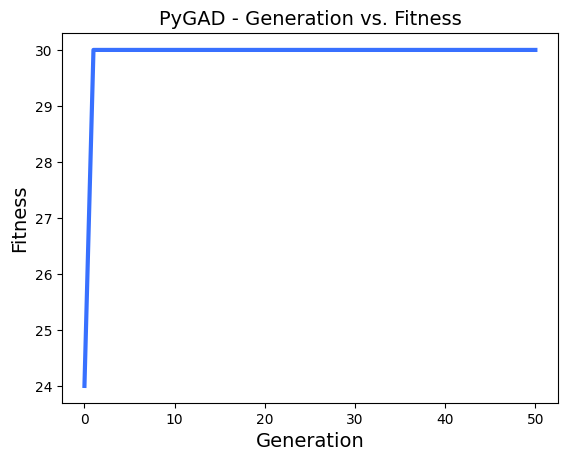

Graph with 5 nodes and 6 edges


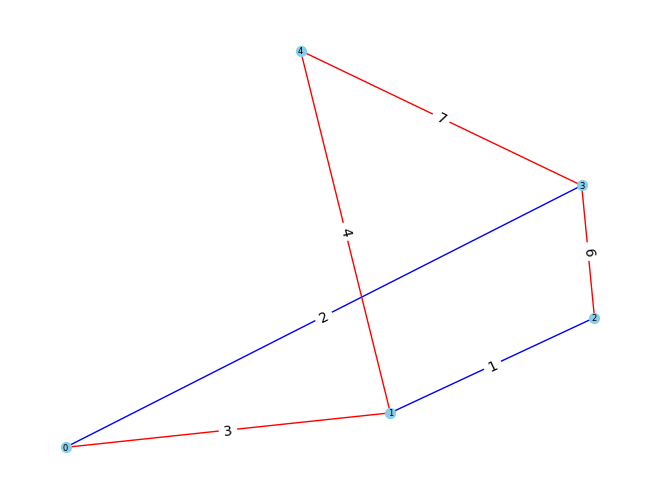

run took 0.25399870000183 seconds
Parameters of the best solution : [0 1 4 3 2]
Fitness value of the best solution = 35.0
Path of the best solution : [0, 1, 4, 3, 2]
Path length of the best solution = 25


<Figure size 640x480 with 0 Axes>

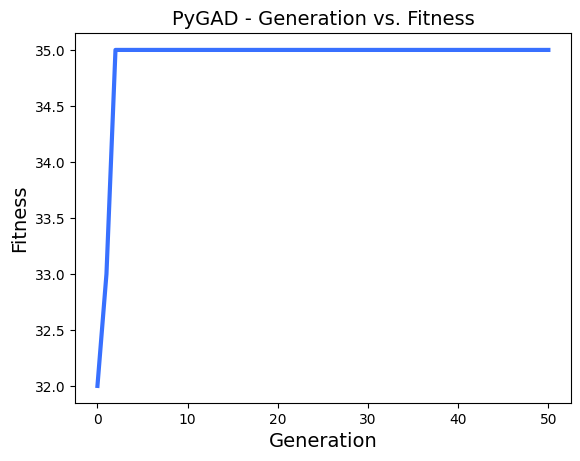

Graph with 5 nodes and 7 edges


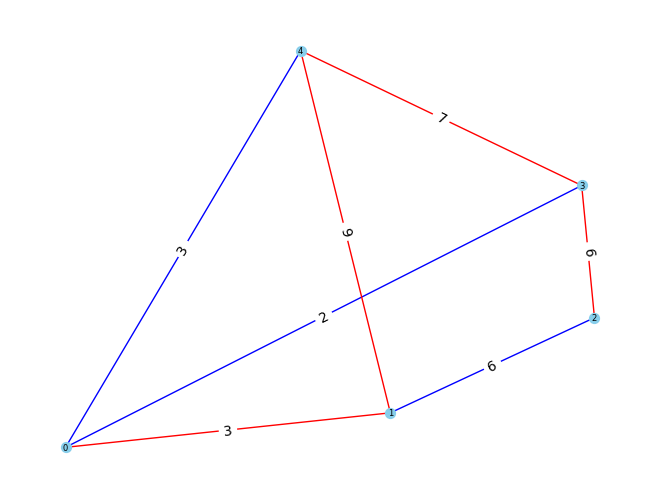

run took 0.23017799999797717 seconds
Parameters of the best solution : [2 1 3 4 0]
Fitness value of the best solution = 41.0
Path of the best solution : [2, 1, 3, 4, 0]
Path length of the best solution = 31


<Figure size 640x480 with 0 Axes>

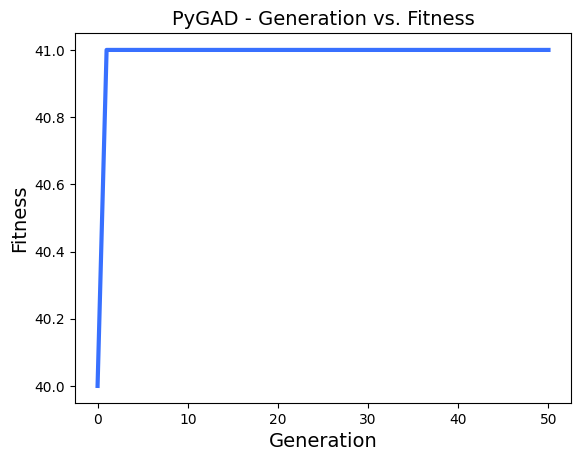

Graph with 5 nodes and 9 edges


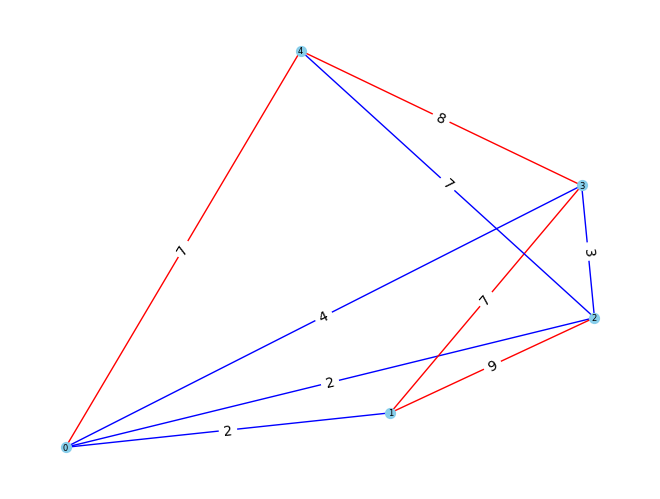

run took 2.3574429000000237 seconds
Parameters of the best solution : [7 6 5 9 8 0 1 4 3 2]
Fitness value of the best solution = -30.0
Path of the best solution : [6, 5, 9, 8, 0, 1, 4, 3, 2]
Path length of the best solution = 33


<Figure size 640x480 with 0 Axes>

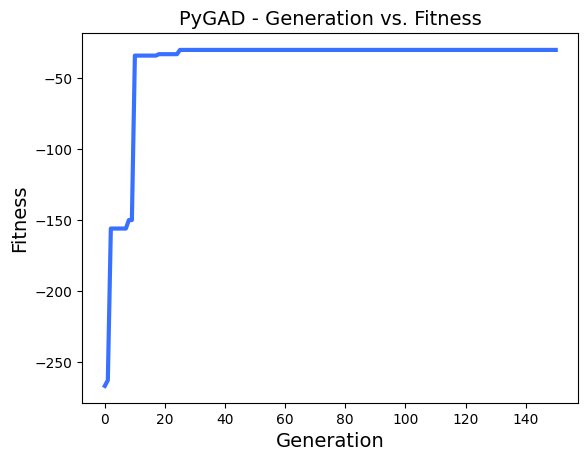

Graph with 10 nodes and 12 edges


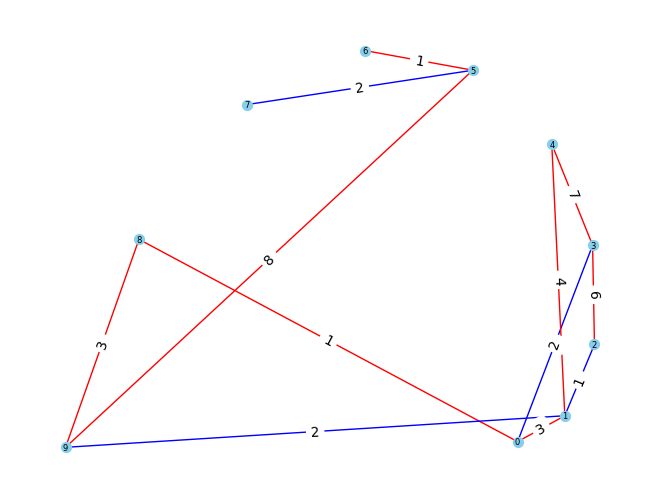

run took 2.311997100001463 seconds
Parameters of the best solution : [1 8 9 2 4 5 6 0 3 7]
Fitness value of the best solution = -6.0
Path of the best solution : [9, 2, 4, 5, 6, 0, 3, 7]
Path length of the best solution = 54


<Figure size 640x480 with 0 Axes>

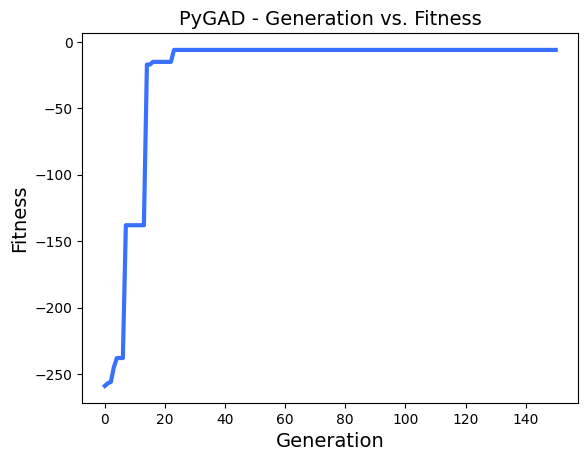

Graph with 10 nodes and 14 edges


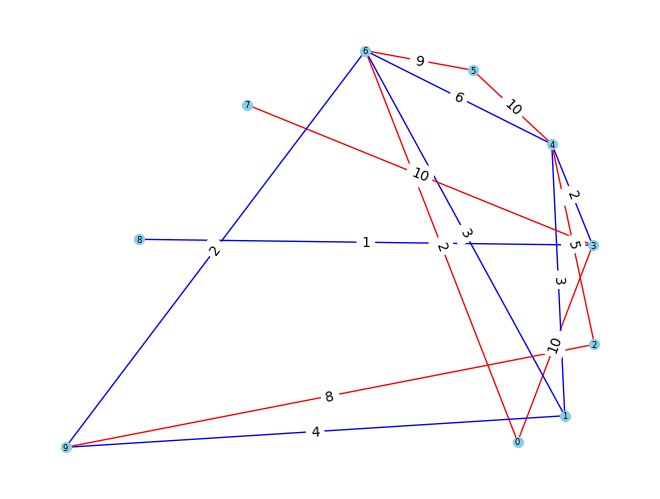

run took 2.390165300002991 seconds
Parameters of the best solution : [5 1 3 6 4 7 0 9 2 8]
Fitness value of the best solution = 105.0
Path of the best solution : [5, 1, 3, 6, 4, 7, 0, 9, 2, 8]
Path length of the best solution = 60


<Figure size 640x480 with 0 Axes>

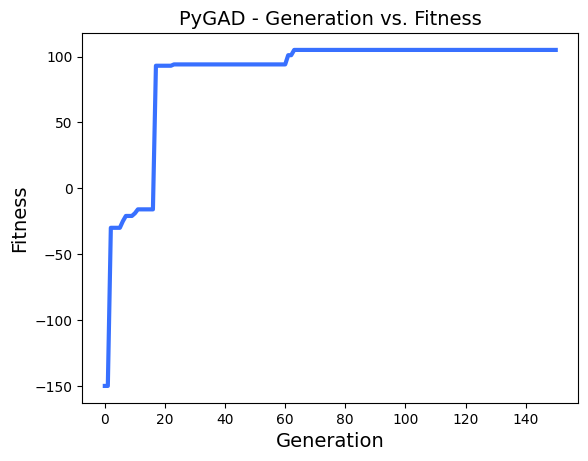

Graph with 10 nodes and 18 edges


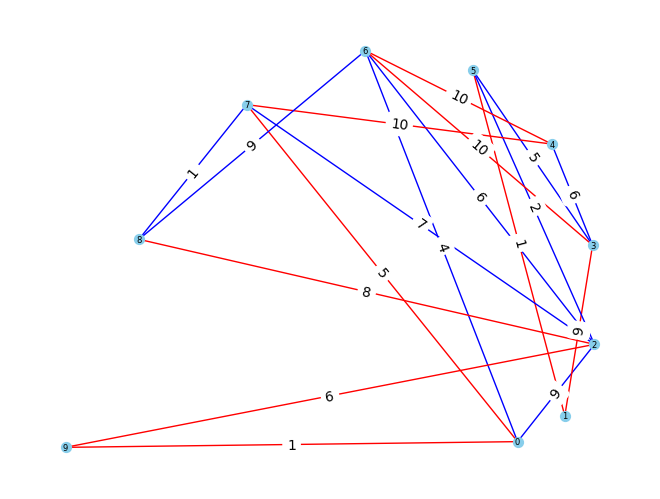

run took 32.686151800000516 seconds
Parameters of the best solution : [16 10 11 15 14 19 17 13 12  7  5  9  8  0  1  4  3  2 18  6]
Fitness value of the best solution = -221.0
Path of the best solution : [15, 14, 19, 17, 13, 12, 7, 5, 9, 8, 0, 1, 4, 3, 2]
Path length of the best solution = 51


<Figure size 640x480 with 0 Axes>

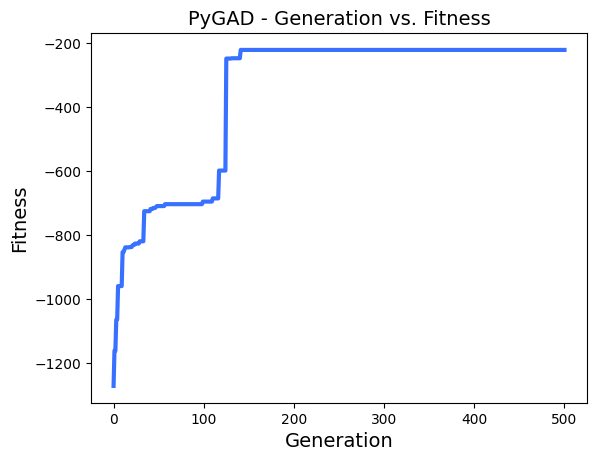

Graph with 20 nodes and 23 edges


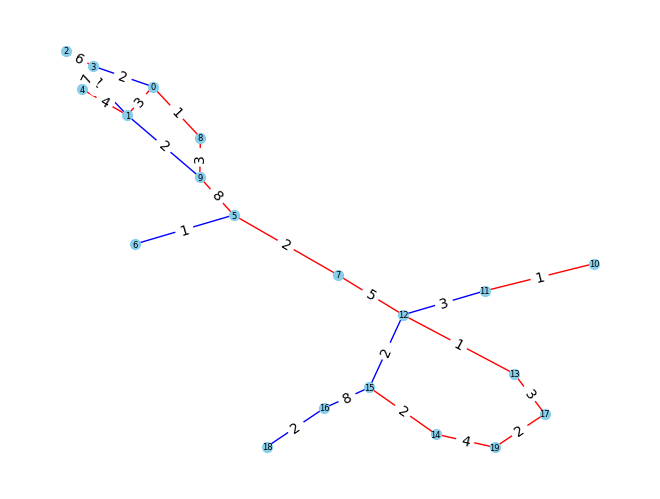

run took 31.220253300001787 seconds
Parameters of the best solution : [ 5  1 13  9 10 18  4 12  2 14 15  3 11 19  0  8 16  7  6 17]
Fitness value of the best solution = -194.0
Path of the best solution : [5, 1, 13, 9, 10, 18, 4, 12, 2, 14, 15, 3, 11, 19, 0, 8]
Path length of the best solution = 86


<Figure size 640x480 with 0 Axes>

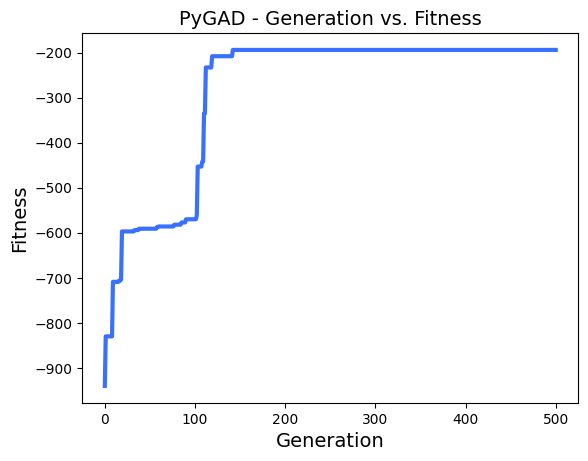

Graph with 20 nodes and 24 edges


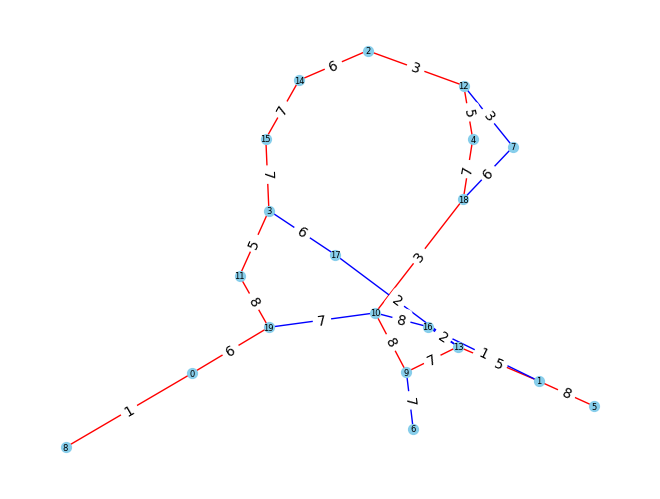

run took 32.41570590000265 seconds
Parameters of the best solution : [ 2 12 16  6  5  3 17 11 14 10  8  9  4 13  1  7 15 19  0 18]
Fitness value of the best solution = -66.0
Path of the best solution : [6, 5, 3, 17, 11, 14, 10, 8, 9, 4, 13, 1, 7, 15, 19, 0]
Path length of the best solution = 92


<Figure size 640x480 with 0 Axes>

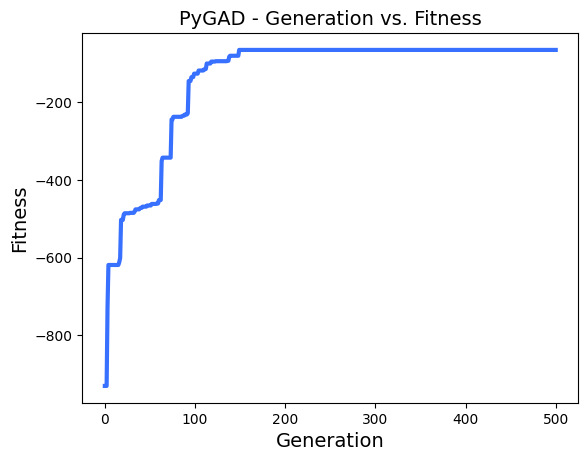

Graph with 20 nodes and 32 edges


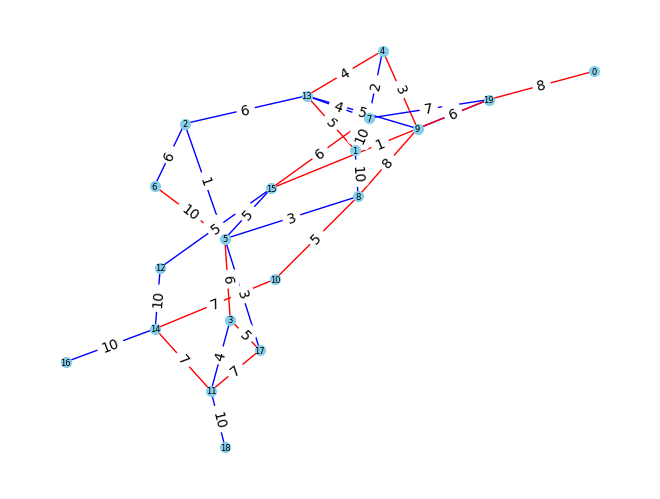

In [17]:
# Model znajduje długie ścieżki w grafach,
# Jednak często nie znajdzie najdłuższej ścieżki, bo skupia się na rozszerzaniu i optymalizowaniu tej,
# którą już znalazł, a nie na szukaniu zupełnie innych rozwiązań, co widać na większych grafach
# (* - dla idealnych wyników, ? - dla wyników które mogą nie być są idealne)
# Najlepsze znalezione wyniki:
# Small:
#  *1. 20 [2, 3, 4, 1, 0]
#  *2. 25 [0, 1, 4, 3, 2]
#  *3. 31 [0, 4, 3, 1, 2]
# Medium:
#  *1. 34 [2, 3, 4, 1, 0, 8, 9, 5, 7]
#  *2. 58 [1, 9, 2, 4, 5, 6, 0, 3, 7]
#  *3. 60 [8, 2, 9, 0, 7, 4, 6, 3, 1, 5]
# Large:
#  *1. 61 [2, 3, 4, 1, 0, 8, 9, 5, 7, 12, 13, 17, 19, 14, 15, 16, 18]
#  ?2. 86 [0, 19, 11, 3, 15, 14, 2, 12, 4, 18, 10, 16, 1, 13, 9, 6]
#  ?3. 118 [6, 5, 3, 17, 11, 14, 12, 15, 19, 7, 1, 8, 9, 4, 13, 2]

# Wartości rozmiarów populacji, generacji i z nich też wynikają inne parametry
size_values = [50,150,500]
matrices=[small_matrices,medium_matrices,large_matrices]
for sized_idx,sized_matrices in enumerate(matrices):
    # jaka wielkość macierzy jest aktualnie sprawdzana 0-small, 1-medium, 2-large
    matrix_size=sized_idx
    for idx,matrix in enumerate(sized_matrices):
        # definiujemy funkcję fitness tutaj bo trzeba przekazac macierz relacji do paczki funcs
        # zakomentować jeśli chcemy odpalić bez paczki funcs
        def fitness_func(solution, solution_idx):
            return funcs.fitness_func(solution, solution_idx, matrix)
        
        # wierzchołki grafu
        gene_space = np.array([i for i in range(len(matrix))])

        fitness_function = fitness_func


        # chromosom to permutacja wszystkich wierzchołków, bo maksymalnie możemy przejść przez każdy wierzchołek tylko raz <--------------------- chromosom
        # dlatego w jakiejs permutacji wierzcholkow bedzie zawarta najdluzsza sciezka
        num_genes = len(matrix)

        # parametry zależne od wielkości macierzy (50,150,500)
        # małe działają super, średnie okej (50%), duże nie działają dobrze (6%) dla tej populacji, ale to by trwało zbyt długo, już jest ~36s na próbe
        sol_per_pop = size_values[matrix_size]
        num_generations = size_values[matrix_size]
        num_parents_mating = size_values[matrix_size]//3
        keep_parents = num_parents_mating//2

        parent_selection_type = "sss"

        # nie było dużych zalet z różnymi typami krzyżowania, więc zostawiłem ten
        crossover_type = "single_point"
        # tak samo dla mutacji
        mutation_type = "random"
        # wybrałem 2 geny dla mutacji, żeby była większa szansa na łączenie podścieżek, 
        # ale nie więcej, bo dla większych grafów, na przeestrzeni 500 generacji fitness nie osiągał maksymalnej wartosci
        # zapewne dla 2k generacji by to działało i nawet lepsze ścieżki bym znajdował, ale to by trwało zbyt długo
        mutation_percent_genes = 100//len(matrix) * 2 #2 genes
        
        @timer
        def run():
            ga_instance = pygad.GA(num_generations=num_generations,
                                    num_parents_mating=num_parents_mating,
                                    fitness_func=fitness_function,
                                    sol_per_pop=sol_per_pop,
                                    num_genes=num_genes,
                                    init_range_low=0,
                                    init_range_high=len(matrix),
                                    keep_parents=keep_parents,
                                    parent_selection_type=parent_selection_type,
                                    crossover_type=crossover_type,
                                    mutation_type=mutation_type,
                                    mutation_percent_genes=mutation_percent_genes,
                                    gene_type=int,
                                    # tutaj należy ustawić unikalne wierzcholki ścieżki, żeby tego nie sprawdzać w fitness
                                    # dzieki temu fitness jest prostszy, szybszy i model nie musi się uczyć omijać duplikaty
                                    allow_duplicate_genes=False,
                                    gene_space=gene_space,
                                    )
            ga_instance.run()
            return ga_instance
        result = run()
        solution, solution_fitness, solution_idx = result.best_solution()
        print(f"Parameters of the best solution : {solution}")
        print(f"Fitness value of the best solution = {solution_fitness}")
        # wyciagniecie sciezki z solution dla czytelnosci
        # wartosc fitness nie odpowiada dlugosci sciezki
        (path, path_length)=getThatPath(matrix,solution)
        print(f"Path of the best solution : {path}")
        print(f"Path length of the best solution = {path_length}")

        # wykresy i graf
        plt.figure(2*idx+1)
        # wykres fitnessu
        result.plot_fitness()
        plt.figure(2*idx+2)
        def build_graph(matrix):
            G = nx.Graph()
            G.add_nodes_from(range(len(matrix)))
            for i in range(len(matrix)):
                for j in range(len(matrix)):
                    if matrix[i][j] != 0:
                        G.add_edge(i,j, weight=matrix[i][j], length = matrix[i][j], color='b')
            return G

        G=build_graph(matrix)
        print(G.__str__())
        # kolorowanie krawędzi ścieżek na czerwono
        for i in range(len(solution)-1):
            if matrix[solution[i]][solution[i+1]] != 0:
                G[solution[i]][solution[i+1]]['color'] = 'r'
        edge_colors = [G[u][v]['color'] for u,v in G.edges()]
        pos = nx.spiral_layout(G) if len(G) < 20 else nx.spring_layout(G)

        # wykres grafu
        nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color=edge_colors, width=1, node_size = 50, edge_cmap=plt.cm.Blues, font_size=6)
        labels = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        plt.show()

#### 3. Najlepsze znalezione wyniki przez program

Funkcja poniżej od razu je narysuje.

    # Small:
    #  *1. 20 [2, 3, 4, 1, 0]
    #  *2. 25 [0, 1, 4, 3, 2]
    #  *3. 31 [0, 4, 3, 1, 2]
    # Medium:
    #  *1. 34 [2, 3, 4, 1, 0, 8, 9, 5, 7]
    #  *2. 58 [1, 9, 2, 4, 5, 6, 0, 3, 7]
    #  *3. 60 [8, 2, 9, 0, 7, 4, 6, 3, 1, 5]
    # Large:
    #  *1. 61 [2, 3, 4, 1, 0, 8, 9, 5, 7, 12, 13, 17, 19, 14, 15, 16, 18]
    #  ?2. 89 [7, 18, 4, 12, 2, 14, 15, 3, 11, 19, 10, 16, 1, 13, 9, 6]
    #  ?3. 118 [6, 5, 3, 17, 11, 14, 12, 15, 19, 7, 1, 8, 9, 4, 13, 2]

Graph with 5 nodes and 6 edges
Path of the best solution : [2, 3, 4, 1, 0]
Length of the best solution : 20


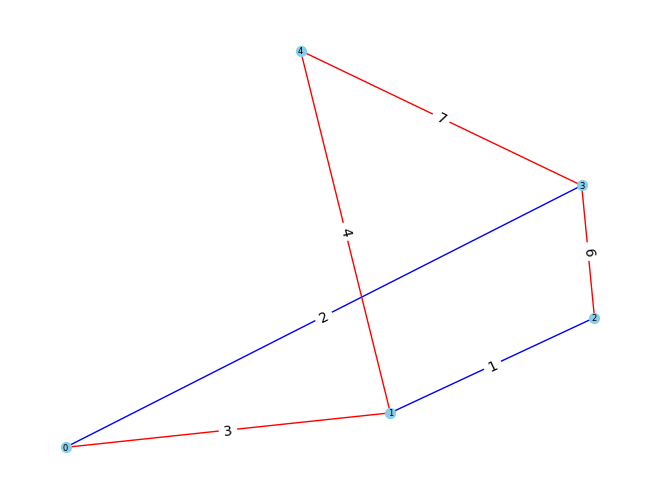

Graph with 5 nodes and 7 edges
Path of the best solution : [0, 1, 4, 3, 2]
Length of the best solution : 25


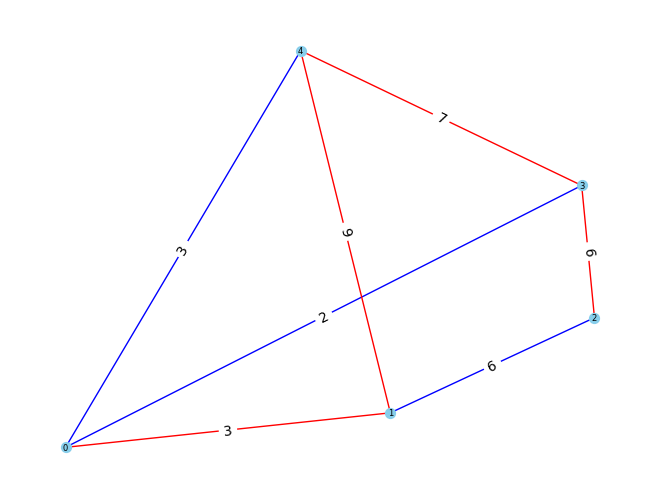

Graph with 5 nodes and 9 edges
Path of the best solution : [0, 4, 3, 1, 2]
Length of the best solution : 31


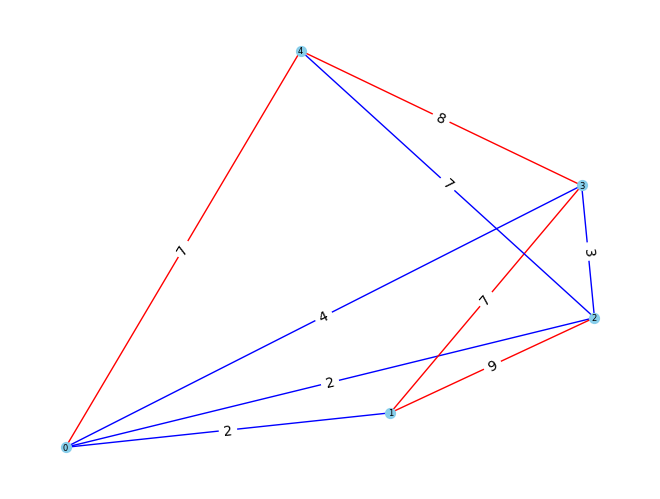

Graph with 10 nodes and 12 edges
Path of the best solution : [2, 3, 4, 1, 0, 8, 9, 5, 7]
Length of the best solution : 34


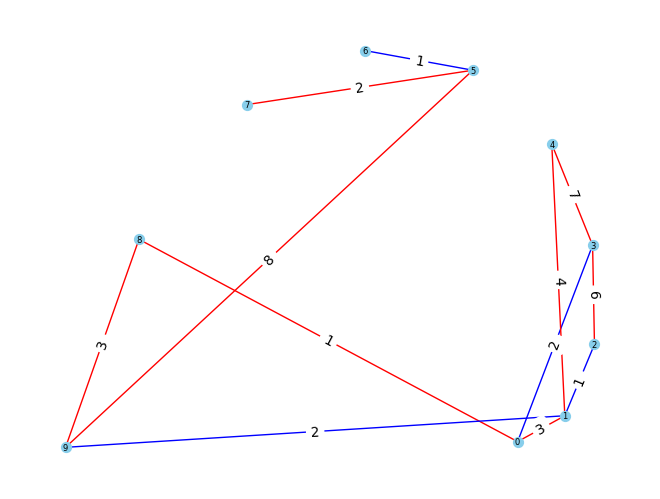

Graph with 10 nodes and 14 edges
Path of the best solution : [1, 9, 2, 4, 5, 6, 0, 3, 7]
Length of the best solution : 58


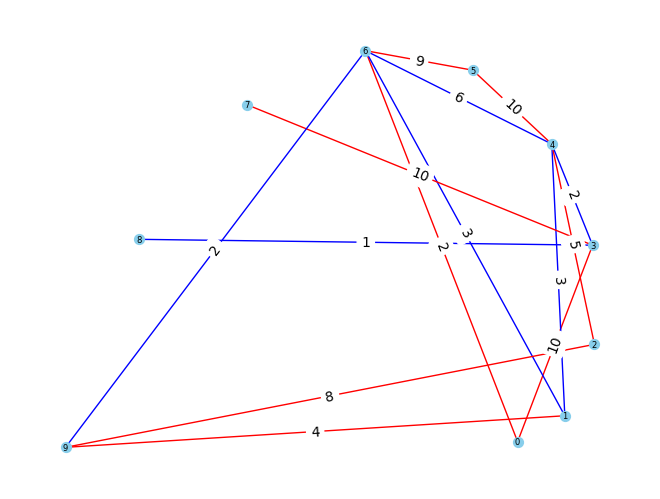

Graph with 10 nodes and 18 edges
Path of the best solution : [8, 2, 9, 0, 7, 4, 6, 3, 1, 5]
Length of the best solution : 60


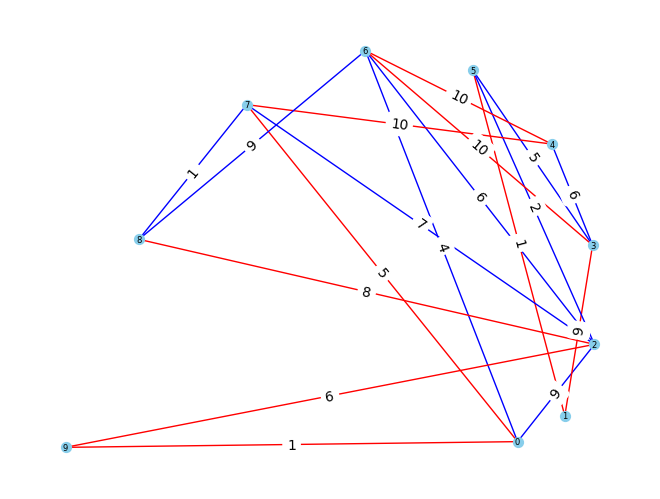

Graph with 20 nodes and 23 edges
Path of the best solution : [2, 3, 4, 1, 0, 8, 9, 5, 7, 12, 13, 17, 19, 14, 15, 16, 18]
Length of the best solution : 61


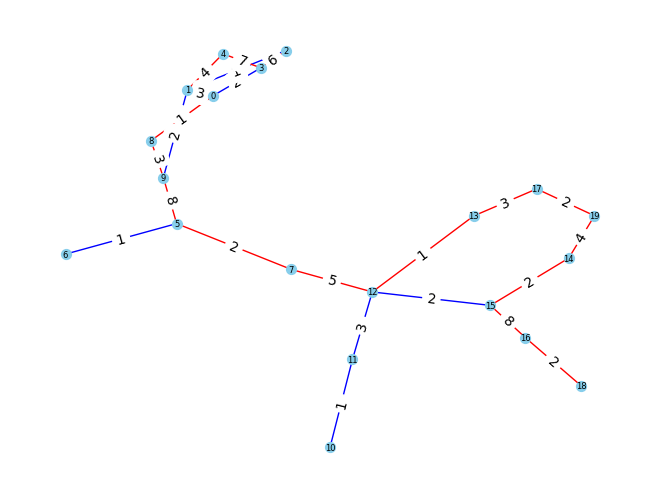

Graph with 20 nodes and 24 edges
Path of the best solution : [0, 19, 11, 3, 15, 14, 2, 12, 4, 18, 10, 16, 1, 13, 9, 6]
Length of the best solution : 86


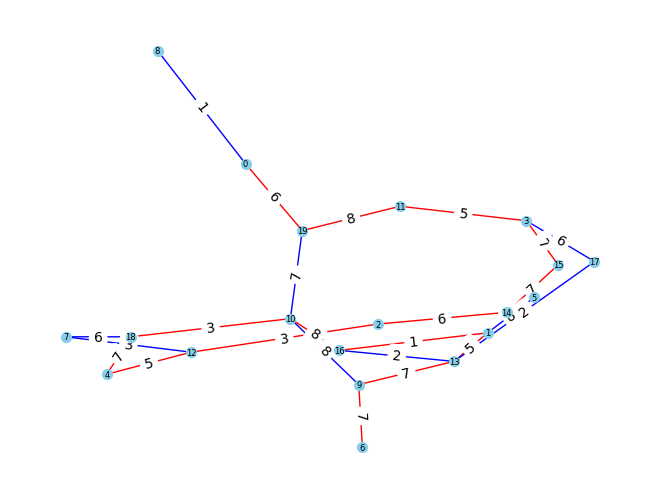

Graph with 20 nodes and 32 edges
Path of the best solution : [6, 5, 3, 17, 11, 14, 12, 15, 19, 7, 1, 8, 9, 4, 13, 2]
Length of the best solution : 118


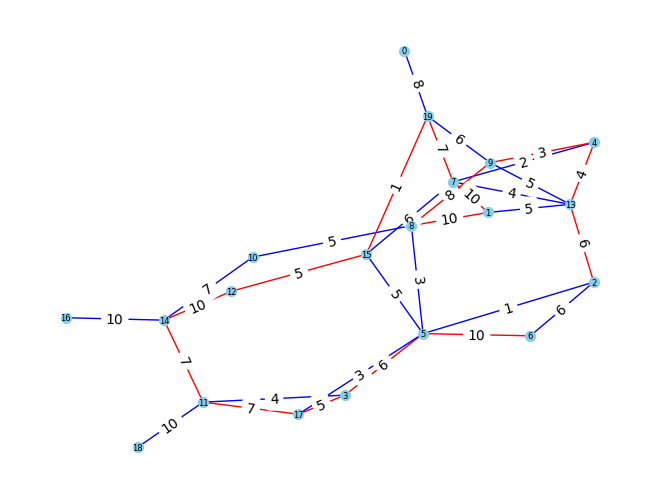

In [18]:
def draw_best_results():
    matrices = [small_matrices, medium_matrices, large_matrices]
    solutions = [[[2, 3, 4, 1, 0], [0, 1, 4, 3, 2], [0, 4, 3, 1, 2]],
                 [[2, 3, 4, 1, 0, 8, 9, 5, 7], [1, 9, 2, 4, 5, 6, 0, 3, 7], [8, 2, 9, 0, 7, 4, 6, 3, 1, 5]],
                 [[2, 3, 4, 1, 0, 8, 9, 5, 7, 12, 13, 17, 19, 14, 15, 16, 18], [0, 19, 11, 3, 15, 14, 2, 12, 4, 18, 10, 16, 1, 13, 9, 6], [6, 5, 3, 17, 11, 14, 12, 15, 19, 7, 1, 8, 9, 4, 13, 2]]]
    lengths = [[20, 25, 31], [34, 58, 60], [61, 86, 118]]
    for i in range(9):
        plt.figure(i)
        matrix=matrices[i//3][i%3]
        solution=solutions[i//3][i%3]
        length=lengths[i//3][i%3]
        def build_graph(matrix):
            G = nx.Graph()
            G.add_nodes_from(range(len(matrix)))
            for i in range(len(matrix)):
                for j in range(len(matrix)):
                    if matrix[i][j] != 0:
                        G.add_edge(i,j, weight=matrix[i][j], length = matrix[i][j], color='b')
            return G

        G=build_graph(matrix)
        print(G.__str__())
        # kolorowanie krawędzi ścieżek na czerwono
        for i in range(len(solution)-1):
            if matrix[solution[i]][solution[i+1]] != 0:
                G[solution[i]][solution[i+1]]['color'] = 'r'
        edge_colors = [G[u][v]['color'] for u,v in G.edges()]
        # dla małych grafów ustawienie węzłów na spiralę, dla większych na spring, dla czytelności
        pos = nx.spiral_layout(G) if len(G) < 20 else nx.spring_layout(G)

        # wykres grafu
        nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color=edge_colors, width=1, node_size = 50, edge_cmap=plt.cm.Blues, font_size=6)
        labels = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        print(f"Path of the best solution : {solution}")
        print(f"Length of the best solution : {length}")
        plt.show()
draw_best_results()

#### 4. Eksperymenty

Przeprowadzone zostały testy dla 100 losowych grafów każdej wielkości. Wnioski są zapisane w punkcie 5.
- GID - graph id
- pl - path length
- max - max path length
- path - longest path in solution

Poniżej zamieszczam wyniki:

##### Wyniki małych

Small: 100/100, avg_time - 0.24263531800002966

1. GID: 1 pl: 25, max: 25, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
2. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
3. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
4. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
5. GID: 0 pl: 20, max: 20, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
6. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
7. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
8. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
9. GID: 0 pl: 20, max: 20, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
10. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
11. GID: 1 pl: 25, max: 25, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
12. GID: 1 pl: 25, max: 25, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
13. GID: 1 pl: 25, max: 25, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
14. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
15. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
16. GID: 2 pl: 31, max: 31, path: [0, 4, 3, 1, 2] solution: [0 4 3 1 2]
17. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
18. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
19. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
20. GID: 1 pl: 25, max: 25, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
21. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
22. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
23. GID: 1 pl: 25, max: 25, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
24. GID: 2 pl: 31, max: 31, path: [0, 4, 3, 1, 2] solution: [0 4 3 1 2]
25. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
26. GID: 2 pl: 31, max: 31, path: [0, 4, 3, 1, 2] solution: [0 4 3 1 2]
27. GID: 2 pl: 31, max: 31, path: [0, 4, 3, 1, 2] solution: [0 4 3 1 2]
28. GID: 1 pl: 25, max: 25, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
29. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
30. GID: 1 pl: 25, max: 25, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
31. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
32. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
33. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
34. GID: 0 pl: 20, max: 20, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
35. GID: 1 pl: 25, max: 25, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
36. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
37. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
38. GID: 1 pl: 25, max: 25, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
39. GID: 0 pl: 20, max: 20, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
40. GID: 1 pl: 25, max: 25, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
41. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
42. GID: 2 pl: 31, max: 31, path: [0, 4, 3, 1, 2] solution: [0 4 3 1 2]
43. GID: 1 pl: 25, max: 25, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
44. GID: 1 pl: 25, max: 25, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
45. GID: 1 pl: 25, max: 25, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
46. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
47. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
48. GID: 2 pl: 31, max: 31, path: [0, 4, 3, 1, 2] solution: [0 4 3 1 2]
49. GID: 2 pl: 31, max: 31, path: [0, 4, 3, 1, 2] solution: [0 4 3 1 2]
50. GID: 0 pl: 20, max: 20, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
51. GID: 0 pl: 20, max: 20, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
52. GID: 1 pl: 25, max: 25, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
53. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
54. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
55. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
56. GID: 1 pl: 25, max: 25, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
57. GID: 2 pl: 31, max: 31, path: [0, 4, 3, 1, 2] solution: [0 4 3 1 2]
58. GID: 1 pl: 25, max: 25, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
59. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
60. GID: 1 pl: 25, max: 25, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
61. GID: 1 pl: 25, max: 25, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
62. GID: 1 pl: 25, max: 25, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
63. GID: 0 pl: 20, max: 20, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
64. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
65. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
66. GID: 0 pl: 20, max: 20, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
67. GID: 1 pl: 25, max: 25, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
68. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
69. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
70. GID: 2 pl: 31, max: 31, path: [0, 4, 3, 1, 2] solution: [0 4 3 1 2]
71. GID: 2 pl: 31, max: 31, path: [0, 4, 3, 1, 2] solution: [0 4 3 1 2]
72. GID: 2 pl: 31, max: 31, path: [0, 4, 3, 1, 2] solution: [0 4 3 1 2]
73. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
74. GID: 1 pl: 25, max: 25, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
75. GID: 1 pl: 25, max: 25, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
76. GID: 1 pl: 25, max: 25, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
77. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
78. GID: 1 pl: 25, max: 25, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
79. GID: 0 pl: 20, max: 20, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
80. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
81. GID: 1 pl: 25, max: 25, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
82. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
83. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
84. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
85. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
86. GID: 1 pl: 25, max: 25, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
87. GID: 2 pl: 31, max: 31, path: [0, 4, 3, 1, 2] solution: [0 4 3 1 2]
88. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
89. GID: 2 pl: 31, max: 31, path: [0, 4, 3, 1, 2] solution: [0 4 3 1 2]
90. GID: 1 pl: 25, max: 25, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
91. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
92. GID: 1 pl: 25, max: 25, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
93. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
94. GID: 0 pl: 20, max: 20, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
95. GID: 0 pl: 20, max: 20, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]
96. GID: 2 pl: 31, max: 31, path: [2, 1, 3, 4, 0] solution: [2 1 3 4 0]
97. GID: 2 pl: 31, max: 31, path: [0, 4, 3, 1, 2] solution: [0 4 3 1 2]
98. GID: 1 pl: 25, max: 25, path: [2, 3, 4, 1, 0] solution: [2 3 4 1 0]
99. GID: 2 pl: 31, max: 31, path: [0, 4, 3, 1, 2] solution: [0 4 3 1 2]
100. GID: 0 pl: 20, max: 20, path: [0, 1, 4, 3, 2] solution: [0 1 4 3 2]

##### Wyniki średnich

Medium: 48/100, avg_time - 2.503469523999884

1. GID: 0 pl: 34, max: 34, path: [7, 5, 9, 8, 0, 1, 4, 3, 2] solution: [7 5 9 8 0 1 4 3 2 6]
2. GID: 0 pl: 21, max: 34, path: [8, 0, 1, 4, 3, 2] solution: [5 9 7 8 0 1 4 3 2 6]
3. GID: 1 pl: 54, max: 58, path: [9, 2, 4, 5, 6, 0, 3, 7] solution: [1 8 9 2 4 5 6 0 3 7]
4. GID: 2 pl: 52, max: 60, path: [8, 6, 0, 7, 4, 3, 1, 5, 2, 9] solution: [8 6 0 7 4 3 1 5 2 9]
5. GID: 2 pl: 59, max: 60, path: [9, 0, 7, 4, 6, 8, 2, 5, 3, 1] solution: [9 0 7 4 6 8 2 5 3 1]
6. GID: 0 pl: 28, max: 34, path: [3, 4, 1, 0, 8, 9, 5, 7] solution: [2 6 3 4 1 0 8 9 5 7]
7. GID: 0 pl: 34, max: 34, path: [2, 3, 4, 1, 0, 8, 9, 5, 7] solution: [2 3 4 1 0 8 9 5 7 6]
8. GID: 2 pl: 56, max: 60, path: [9, 2, 0, 7, 8, 6, 4, 3, 1, 5] solution: [9 2 0 7 8 6 4 3 1 5]
9. GID: 0 pl: 34, max: 34, path: [7, 5, 9, 8, 0, 1, 4, 3, 2] solution: [7 5 9 8 0 1 4 3 2 6]
10. GID: 2 pl: 49, max: 60, path: [1, 3, 4, 6, 8, 7, 0, 9, 2, 5] solution: [1 3 4 6 8 7 0 9 2 5]
11. GID: 2 pl: 50, max: 60, path: [8, 6, 3, 4, 7, 0, 9, 2, 5, 1] solution: [8 6 3 4 7 0 9 2 5 1]
12. GID: 2 pl: 57, max: 60, path: [8, 6, 4, 7, 0, 9, 2, 5, 3, 1] solution: [8 6 4 7 0 9 2 5 3 1]
13. GID: 0 pl: 28, max: 34, path: [3, 4, 1, 0, 8, 9, 5, 7] solution: [3 4 1 0 8 9 5 7 2 6]
14. GID: 0 pl: 34, max: 34, path: [2, 3, 4, 1, 0, 8, 9, 5, 7] solution: [2 3 4 1 0 8 9 5 7 6]
15. GID: 0 pl: 34, max: 34, path: [2, 3, 4, 1, 0, 8, 9, 5, 7] solution: [2 3 4 1 0 8 9 5 7 6]
16. GID: 0 pl: 32, max: 34, path: [5, 9, 8, 0, 1, 4, 3, 2] solution: [5 9 8 0 1 4 3 2 6 7]
17. GID: 0 pl: 34, max: 34, path: [2, 3, 4, 1, 0, 8, 9, 5, 7] solution: [2 3 4 1 0 8 9 5 7 6]
18. GID: 2 pl: 55, max: 60, path: [5, 1, 3, 4, 7, 0, 9, 2, 8, 6] solution: [5 1 3 4 7 0 9 2 8 6]
19. GID: 0 pl: 34, max: 34, path: [2, 3, 4, 1, 0, 8, 9, 5, 7] solution: [2 3 4 1 0 8 9 5 7 6]
20. GID: 0 pl: 34, max: 34, path: [7, 5, 9, 8, 0, 1, 4, 3, 2] solution: [7 5 9 8 0 1 4 3 2 6]
21. GID: 1 pl: 49, max: 58, path: [8, 3, 0, 6, 5, 4, 2, 9, 1] solution: [7 8 3 0 6 5 4 2 9 1]
22. GID: 0 pl: 34, max: 34, path: [2, 3, 4, 1, 0, 8, 9, 5, 7] solution: [2 3 4 1 0 8 9 5 7 6]
23. GID: 1 pl: 54, max: 58, path: [9, 2, 4, 5, 6, 0, 3, 7] solution: [1 8 9 2 4 5 6 0 3 7]
24. GID: 1 pl: 54, max: 58, path: [9, 2, 4, 5, 6, 0, 3, 7] solution: [1 8 9 2 4 5 6 0 3 7]
25. GID: 2 pl: 59, max: 60, path: [9, 0, 7, 4, 6, 8, 2, 5, 3, 1] solution: [9 0 7 4 6 8 2 5 3 1]
26. GID: 1 pl: 54, max: 58, path: [9, 2, 4, 5, 6, 0, 3, 7] solution: [1 8 9 2 4 5 6 0 3 7]
27. GID: 0 pl: 28, max: 34, path: [3, 4, 1, 0, 8, 9, 5, 7] solution: [3 4 1 0 8 9 5 7 6 2]
28. GID: 0 pl: 34, max: 34, path: [2, 3, 4, 1, 0, 8, 9, 5, 7] solution: [2 3 4 1 0 8 9 5 7 6]
29. GID: 1 pl: 58, max: 58, path: [1, 9, 2, 4, 5, 6, 0, 3, 7] solution: [1 9 2 4 5 6 0 3 7 8]
30. GID: 2 pl: 58, max: 60, path: [9, 2, 8, 6, 0, 7, 4, 3, 1, 5] solution: [9 2 8 6 0 7 4 3 1 5]
31. GID: 1 pl: 58, max: 58, path: [7, 3, 0, 6, 5, 4, 2, 9, 1] solution: [7 3 0 6 5 4 2 9 1 8]
32. GID: 2 pl: 49, max: 60, path: [1, 3, 4, 6, 8, 7, 0, 9, 2, 5] solution: [1 3 4 6 8 7 0 9 2 5]
33. GID: 1 pl: 58, max: 58, path: [1, 9, 2, 4, 5, 6, 0, 3, 7] solution: [1 9 2 4 5 6 0 3 7 8]
34. GID: 1 pl: 58, max: 58, path: [1, 9, 2, 4, 5, 6, 0, 3, 7] solution: [1 9 2 4 5 6 0 3 7 8]
35. GID: 1 pl: 58, max: 58, path: [1, 9, 2, 4, 5, 6, 0, 3, 7] solution: [1 9 2 4 5 6 0 3 7 8]
36. GID: 0 pl: 34, max: 34, path: [7, 5, 9, 8, 0, 1, 4, 3, 2] solution: [7 5 9 8 0 1 4 3 2 6]
37. GID: 0 pl: 28, max: 34, path: [3, 4, 1, 0, 8, 9, 5, 7] solution: [2 6 3 4 1 0 8 9 5 7]
38. GID: 1 pl: 48, max: 58, path: [3, 0, 6, 5, 4, 2, 9, 1] solution: [3 0 6 5 4 2 9 1 7 8]
39. GID: 0 pl: 34, max: 34, path: [2, 3, 4, 1, 0, 8, 9, 5, 7] solution: [2 3 4 1 0 8 9 5 7 6]
40. GID: 2 pl: 53, max: 60, path: [8, 7, 4, 6, 3, 1, 5, 2, 0, 9] solution: [8 7 4 6 3 1 5 2 0 9]
41. GID: 0 pl: 34, max: 34, path: [2, 3, 4, 1, 0, 8, 9, 5, 7] solution: [2 3 4 1 0 8 9 5 7 6]
42. GID: 1 pl: 58, max: 58, path: [1, 9, 2, 4, 5, 6, 0, 3, 7] solution: [1 9 2 4 5 6 0 3 7 8]
43. GID: 1 pl: 58, max: 58, path: [1, 9, 2, 4, 5, 6, 0, 3, 7] solution: [1 9 2 4 5 6 0 3 7 8]
44. GID: 1 pl: 54, max: 58, path: [9, 2, 4, 5, 6, 0, 3, 7] solution: [9 2 4 5 6 0 3 7 1 8]
45. GID: 2 pl: 59, max: 60, path: [9, 0, 7, 4, 6, 8, 2, 5, 3, 1] solution: [9 0 7 4 6 8 2 5 3 1]
46. GID: 0 pl: 34, max: 34, path: [2, 3, 4, 1, 0, 8, 9, 5, 7] solution: [2 3 4 1 0 8 9 5 7 6]
47. GID: 2 pl: 58, max: 60, path: [5, 1, 3, 4, 7, 0, 6, 8, 2, 9] solution: [5 1 3 4 7 0 6 8 2 9]
48. GID: 1 pl: 58, max: 58, path: [7, 3, 0, 6, 5, 4, 2, 9, 1] solution: [7 3 0 6 5 4 2 9 1 8]
49. GID: 2 pl: 56, max: 60, path: [9, 2, 0, 7, 8, 6, 4, 3, 1, 5] solution: [9 2 0 7 8 6 4 3 1 5]
50. GID: 2 pl: 57, max: 60, path: [1, 3, 5, 2, 9, 0, 7, 4, 6, 8] solution: [1 3 5 2 9 0 7 4 6 8]
51. GID: 1 pl: 58, max: 58, path: [1, 9, 2, 4, 5, 6, 0, 3, 7] solution: [1 9 2 4 5 6 0 3 7 8]
52. GID: 0 pl: 28, max: 34, path: [3, 4, 1, 0, 8, 9, 5, 7] solution: [2 6 3 4 1 0 8 9 5 7]
53. GID: 2 pl: 59, max: 60, path: [1, 3, 5, 2, 8, 6, 4, 7, 0, 9] solution: [1 3 5 2 8 6 4 7 0 9]
54. GID: 1 pl: 58, max: 58, path: [1, 9, 2, 4, 5, 6, 0, 3, 7] solution: [1 9 2 4 5 6 0 3 7 8]
55. GID: 0 pl: 32, max: 34, path: [5, 9, 8, 0, 1, 4, 3, 2] solution: [5 9 8 0 1 4 3 2 6 7]
56. GID: 1 pl: 37, max: 58, path: [2, 9, 1, 6, 0, 3, 7] solution: [5 4 8 2 9 1 6 0 3 7]
57. GID: 1 pl: 48, max: 58, path: [3, 0, 6, 5, 4, 2, 9, 1] solution: [3 0 6 5 4 2 9 1 8 7]
58. GID: 2 pl: 49, max: 60, path: [1, 3, 4, 6, 8, 7, 0, 9, 2, 5] solution: [1 3 4 6 8 7 0 9 2 5]
59. GID: 1 pl: 46, max: 58, path: [0, 3, 4, 5, 6, 1, 9, 2] solution: [7 8 0 3 4 5 6 1 9 2]
60. GID: 2 pl: 58, max: 60, path: [9, 2, 8, 6, 0, 7, 4, 3, 1, 5] solution: [9 2 8 6 0 7 4 3 1 5]
61. GID: 0 pl: 28, max: 34, path: [3, 4, 1, 0, 8, 9, 5, 7] solution: [2 6 3 4 1 0 8 9 5 7]
62. GID: 0 pl: 34, max: 34, path: [2, 3, 4, 1, 0, 8, 9, 5, 7] solution: [2 3 4 1 0 8 9 5 7 6]
63. GID: 0 pl: 28, max: 34, path: [3, 4, 1, 0, 8, 9, 5, 7] solution: [2 6 3 4 1 0 8 9 5 7]
64. GID: 2 pl: 58, max: 60, path: [9, 2, 8, 6, 0, 7, 4, 3, 1, 5] solution: [9 2 8 6 0 7 4 3 1 5]
65. GID: 0 pl: 28, max: 34, path: [3, 4, 1, 0, 8, 9, 5, 7] solution: [3 4 1 0 8 9 5 7 2 6]
66. GID: 1 pl: 58, max: 58, path: [1, 9, 2, 4, 5, 6, 0, 3, 7] solution: [1 9 2 4 5 6 0 3 7 8]
67. GID: 0 pl: 34, max: 34, path: [2, 3, 4, 1, 0, 8, 9, 5, 7] solution: [2 3 4 1 0 8 9 5 7 6]
68. GID: 0 pl: 34, max: 34, path: [2, 3, 4, 1, 0, 8, 9, 5, 7] solution: [2 3 4 1 0 8 9 5 7 6]
69. GID: 2 pl: 60, max: 60, path: [5, 1, 3, 6, 4, 7, 0, 9, 2, 8] solution: [5 1 3 6 4 7 0 9 2 8]
70. GID: 0 pl: 34, max: 34, path: [2, 3, 4, 1, 0, 8, 9, 5, 7] solution: [2 3 4 1 0 8 9 5 7 6]
71. GID: 1 pl: 46, max: 58, path: [7, 3, 4, 5, 6, 1, 9, 2] solution: [7 3 4 5 6 1 9 2 0 8]
72. GID: 1 pl: 58, max: 58, path: [1, 9, 2, 4, 5, 6, 0, 3, 7] solution: [1 9 2 4 5 6 0 3 7 8]
73. GID: 1 pl: 58, max: 58, path: [1, 9, 2, 4, 5, 6, 0, 3, 7] solution: [1 9 2 4 5 6 0 3 7 8]
74. GID: 1 pl: 58, max: 58, path: [1, 9, 2, 4, 5, 6, 0, 3, 7] solution: [1 9 2 4 5 6 0 3 7 8]
75. GID: 2 pl: 60, max: 60, path: [5, 1, 3, 6, 4, 7, 0, 9, 2, 8] solution: [5 1 3 6 4 7 0 9 2 8]
76. GID: 1 pl: 58, max: 58, path: [1, 9, 2, 4, 5, 6, 0, 3, 7] solution: [1 9 2 4 5 6 0 3 7 8]
77. GID: 0 pl: 34, max: 34, path: [2, 3, 4, 1, 0, 8, 9, 5, 7] solution: [2 3 4 1 0 8 9 5 7 6]
78. GID: 2 pl: 60, max: 60, path: [5, 1, 3, 6, 4, 7, 0, 9, 2, 8] solution: [5 1 3 6 4 7 0 9 2 8]
79. GID: 0 pl: 28, max: 34, path: [3, 4, 1, 0, 8, 9, 5, 7] solution: [2 6 3 4 1 0 8 9 5 7]
80. GID: 0 pl: 34, max: 34, path: [2, 3, 4, 1, 0, 8, 9, 5, 7] solution: [2 3 4 1 0 8 9 5 7 6]
81. GID: 2 pl: 59, max: 60, path: [9, 0, 7, 4, 6, 8, 2, 5, 3, 1] solution: [9 0 7 4 6 8 2 5 3 1]
82. GID: 2 pl: 57, max: 60, path: [1, 3, 5, 2, 9, 0, 7, 4, 6, 8] solution: [1 3 5 2 9 0 7 4 6 8]
83. GID: 0 pl: 34, max: 34, path: [2, 3, 4, 1, 0, 8, 9, 5, 7] solution: [2 3 4 1 0 8 9 5 7 6]
84. GID: 1 pl: 58, max: 58, path: [7, 3, 0, 6, 5, 4, 2, 9, 1] solution: [7 3 0 6 5 4 2 9 1 8]
85. GID: 2 pl: 60, max: 60, path: [8, 2, 9, 0, 7, 4, 6, 3, 1, 5] solution: [8 2 9 0 7 4 6 3 1 5]
86. GID: 1 pl: 58, max: 58, path: [1, 9, 2, 4, 5, 6, 0, 3, 7] solution: [1 9 2 4 5 6 0 3 7 8]
87. GID: 1 pl: 58, max: 58, path: [1, 9, 2, 4, 5, 6, 0, 3, 7] solution: [1 9 2 4 5 6 0 3 7 8]
88. GID: 2 pl: 60, max: 60, path: [8, 2, 9, 0, 7, 4, 6, 3, 1, 5] solution: [8 2 9 0 7 4 6 3 1 5]
89. GID: 1 pl: 52, max: 58, path: [7, 3, 0, 6, 1, 9, 2, 4, 5] solution: [7 3 0 6 1 9 2 4 5 8]
90. GID: 1 pl: 41, max: 58, path: [9, 2, 4, 6, 0, 3, 7] solution: [1 5 9 2 4 6 0 3 7 8]
91. GID: 2 pl: 58, max: 60, path: [9, 2, 8, 6, 0, 7, 4, 3, 1, 5] solution: [9 2 8 6 0 7 4 3 1 5]
92. GID: 2 pl: 59, max: 60, path: [9, 0, 2, 8, 7, 4, 6, 3, 1, 5] solution: [9 0 2 8 7 4 6 3 1 5]
93. GID: 1 pl: 58, max: 58, path: [1, 9, 2, 4, 5, 6, 0, 3, 7] solution: [1 9 2 4 5 6 0 3 7 8]
94. GID: 1 pl: 49, max: 58, path: [8, 3, 0, 6, 5, 4, 2, 9, 1] solution: [7 8 3 0 6 5 4 2 9 1]
95. GID: 1 pl: 58, max: 58, path: [1, 9, 2, 4, 5, 6, 0, 3, 7] solution: [1 9 2 4 5 6 0 3 7 8]
96. GID: 1 pl: 54, max: 58, path: [9, 2, 4, 5, 6, 0, 3, 7] solution: [1 8 9 2 4 5 6 0 3 7]
97. GID: 1 pl: 58, max: 58, path: [1, 9, 2, 4, 5, 6, 0, 3, 7] solution: [1 9 2 4 5 6 0 3 7 8]
98. GID: 2 pl: 59, max: 60, path: [4, 7, 0, 9, 2, 8, 6, 3, 1, 5] solution: [4 7 0 9 2 8 6 3 1 5]
99. GID: 1 pl: 54, max: 58, path: [9, 2, 4, 5, 6, 0, 3, 7] solution: [9 2 4 5 6 0 3 7 8 1]
100. GID: 0 pl: 34, max: 34, path: [2, 3, 4, 1, 0, 8, 9, 5, 7] solution: [2 3 4 1 0 8 9 5 7 6]

##### Wyniki dużych

Large: 4/100, avg_time - 33.899295068000065

1. GID: 2 pl: 106, max: 118, path: [11, 17, 3, 5, 6, 2, 13, 9, 4, 7, 1, 8, 10, 14, 12, 15, 19, 0] solution: [18 16 11 17  3  5  6  2 13  9  4  7  1  8 10 14 12 15 19  0]
2. GID: 2 pl: 94, max: 98, path: [19, 7, 1, 8, 10, 14, 11, 17, 3, 5, 6, 2, 13, 9, 4] solution: [12  0 15 16 19  7  1  8 10 14 11 17  3  5  6  2 13  9  4 18]
3. GID: 0 pl: 55, max: 61, path: [3, 4, 1, 0, 8, 9, 5, 7, 12, 13, 17, 19, 14, 15, 16, 18] solution: [ 2 11  6 10  3  4  1  0  8  9  5  7 12 13 17 19 14 15 16 18]
4. GID: 1 pl: 85, max: 89, path: [0, 19, 11, 3, 15, 14, 2, 12, 4, 18, 10, 16, 1, 13, 9, 6] solution: [ 8  5 17  0 19 11  3 15 14  2 12  4 18 10 16  1 13  9  6  7]
5. GID: 2 pl: 106, max: 118, path: [11, 17, 3, 5, 6, 2, 13, 4, 7, 1, 8, 9, 19, 15, 12, 14, 16] solution: [18 10 11 17  3  5  6  2 13  4  7  1  8  9 19 15 12 14 16  0]
6. GID: 0 pl: 50, max: 61, path: [3, 4, 1, 9, 5, 7, 12, 13, 17, 19, 14, 15, 16, 18] solution: [ 3  4  1  9  5  7 12 13 17 19 14 15 16 18  0  8 11  2  6 10]
7. GID: 0 pl: 55, max: 61, path: [3, 4, 1, 0, 8, 9, 5, 7, 12, 13, 17, 19, 14, 15, 16, 18] solution: [ 2 11  6 10  3  4  1  0  8  9  5  7 12 13 17 19 14 15 16 18]
8. GID: 2 pl: 93, max: 98, path: [18, 11, 17, 3, 5, 15, 19, 9, 4, 13, 7, 1, 8, 10, 14, 16] solution: [18 11 17  3  5 15 19  9  4 13  7  1  8 10 14 16  0 12  6  2]
9. GID: 2 pl: 99, max: 118, path: [19, 9, 8, 1, 13, 2, 6, 5, 3, 17, 11, 14, 12, 15, 7, 4] solution: [ 0 16 19  9  8  1 13  2  6  5  3 17 11 14 12 15  7  4 10 18]
10. GID: 2 pl: 96, max: 118, path: [12, 15, 19, 9, 13, 4, 7, 1, 8, 10, 14, 11, 17, 3, 5, 6, 2] solution: [12 15 19  9 13  4  7  1  8 10 14 11 17  3  5  6  2 18 16  0]
11. GID: 1 pl: 86, max: 89, path: [5, 1, 13, 9, 10, 18, 4, 12, 2, 14, 15, 3, 11, 19, 0, 8] solution: [ 5  1 13  9 10 18  4 12  2 14 15  3 11 19  0  8 16  7  6 17]
12. GID: 1 pl: 65, max: 89, path: [14, 2, 12, 4, 18, 10, 16, 1, 13, 17, 3, 11, 19, 0] solution: [15  7  5  9  6  8 14  2 12  4 18 10 16  1 13 17  3 11 19  0]
13. GID: 1 pl: 84, max: 89, path: [5, 1, 16, 13, 9, 10, 18, 4, 12, 2, 14, 15, 3, 11, 19, 0, 8] solution: [ 5  1 16 13  9 10 18  4 12  2 14 15  3 11 19  0  8 17  7  6]
14. GID: 2 pl: 118, max: 118, path: [18, 11, 17, 3, 5, 6, 2, 13, 4, 9, 8, 1, 7, 19, 15, 12, 14, 16] solution: [18 11 17  3  5  6  2 13  4  9  8  1  7 19 15 12 14 16  0 10]
15. GID: 2 pl: 83, max: 118, path: [11, 17, 3, 5, 15, 19, 7, 1, 13, 4, 9, 8, 10, 14, 16] solution: [18  6 11 17  3  5 15 19  7  1 13  4  9  8 10 14 16  2 12  0]
16. GID: 2 pl: 72, max: 118, path: [10, 8, 1, 13, 2, 6, 5, 15, 7, 4, 9, 19, 0] solution: [18 11 14 17 10  8  1 13  2  6  5 15  7  4  9 19  0  3 16 12]
17. GID: 2 pl: 84, max: 118, path: [6, 5, 15, 19, 9, 4, 13, 7, 1, 8, 10, 14, 11, 17, 3] solution: [ 2 18  6  5 15 19  9  4 13  7  1  8 10 14 11 17  3 16 12  0]
18. GID: 0 pl: 51, max: 61, path: [15, 14, 19, 17, 13, 12, 7, 5, 9, 8, 0, 1, 4, 3, 2] solution: [16 11 10 15 14 19 17 13 12  7  5  9  8  0  1  4  3  2 18  6]
19. GID: 2 pl: 105, max: 118, path: [11, 17, 3, 5, 6, 2, 13, 9, 19, 7, 1, 8, 10, 14, 12, 15] solution: [18  4  0 16 11 17  3  5  6  2 13  9 19  7  1  8 10 14 12 15]
20. GID: 1 pl: 54, max: 89, path: [12, 4, 18, 10, 19, 11, 3, 17, 13, 16, 1, 5] solution: [12  4 18 10 19 11  3 17 13 16  1  5 14 15  9  0  7  2  6  8]
21. GID: 2 pl: 93, max: 118, path: [18, 11, 17, 3, 5, 15, 19, 7, 1, 13, 4, 9, 8, 10, 14, 16] solution: [18 11 17  3  5 15 19  7  1 13  4  9  8 10 14 16  0  6 12  2]
22. GID: 0 pl: 23, max: 61, path: [3, 4, 1, 9, 5, 7] solution: [ 3  4  1  9  5  7  6 10  0 11 18  8  2 12 13 17 19 14 15 16]
23. GID: 1 pl: 66, max: 89, path: [9, 13, 17, 3, 11, 19, 10, 18, 4, 12, 2, 14, 15] solution: [ 9 13 17  3 11 19 10 18  4 12  2 14 15  0  6  7  8  1 16  5]
24. GID: 2 pl: 118, max: 118, path: [16, 14, 12, 15, 19, 7, 1, 8, 9, 4, 13, 2, 6, 5, 3, 17, 11, 18] solution: [16 14 12 15 19  7  1  8  9  4 13  2  6  5  3 17 11 18 10  0]
25. GID: 2 pl: 99, max: 118, path: [6, 5, 3, 17, 11, 14, 12, 15, 19, 7, 1, 8, 9, 4, 13, 2] solution: [ 6  5  3 17 11 14 12 15 19  7  1  8  9  4 13  2 16  0 18 10]
26. GID: 1 pl: 75, max: 89, path: [1, 16, 13, 9, 10, 18, 4, 12, 2, 14, 15, 3, 11, 19, 0] solution: [ 5  7 17  6  8  1 16 13  9 10 18  4 12  2 14 15  3 11 19  0]
27. GID: 1 pl: 83, max: 89, path: [18, 4, 12, 2, 14, 15, 3, 11, 19, 10, 16, 1, 13, 9, 6] solution: [ 7  8  0  5 18  4 12  2 14 15  3 11 19 10 16  1 13  9  6 17]
28. GID: 0 pl: 49, max: 61, path: [16, 15, 12, 7, 5, 9, 8, 0, 1, 4, 3, 2] solution: [18 13 16 15 12  7  5  9  8  0  1  4  3  2 10 19 11 17  6 14]
29. GID: 2 pl: 109, max: 118, path: [18, 11, 14, 12, 15, 5, 6, 2, 13, 4, 9, 8, 1, 7, 19, 0] solution: [18 11 14 12 15  5  6  2 13  4  9  8  1  7 19  0 16 10 17  3]
30. GID: 0 pl: 49, max: 61, path: [17, 19, 14, 15, 12, 7, 5, 9, 8, 0, 1, 4, 3, 2] solution: [13 18 17 19 14 15 12  7  5  9  8  0  1  4  3  2  6 16 10 11]
31. GID: 0 pl: 55, max: 61, path: [3, 4, 1, 0, 8, 9, 5, 7, 12, 13, 17, 19, 14, 15, 16, 18] solution: [ 2  6 11 10  3  4  1  0  8  9  5  7 12 13 17 19 14 15 16 18]
32. GID: 0 pl: 49, max: 61, path: [16, 15, 12, 7, 5, 9, 8, 0, 1, 4, 3, 2] solution: [16 15 12  7  5  9  8  0  1  4  3  2 11 18 13 14 19  6 17 10]
33. GID: 1 pl: 78, max: 89, path: [9, 13, 1, 16, 10, 18, 4, 12, 2, 14, 15, 3, 11, 19, 0] solution: [ 6  5  8  7 17  9 13  1 16 10 18  4 12  2 14 15  3 11 19  0]
34. GID: 1 pl: 62, max: 89, path: [1, 16, 13, 17, 3, 11, 19, 10, 18, 4, 12, 2, 14, 15] solution: [ 5  7  8  6  0  9  1 16 13 17  3 11 19 10 18  4 12  2 14 15]
35. GID: 2 pl: 91, max: 118, path: [18, 11, 14, 12, 15, 19, 7, 1, 13, 2, 6, 5, 8, 9, 4] solution: [18 11 14 12 15 19  7  1 13  2  6  5  8  9  4  0 17 16  3 10]
36. GID: 0 pl: 55, max: 61, path: [3, 4, 1, 0, 8, 9, 5, 7, 12, 13, 17, 19, 14, 15, 16, 18] solution: [ 2  6  3  4  1  0  8  9  5  7 12 13 17 19 14 15 16 18 11 10]
37. GID: 1 pl: 71, max: 89, path: [18, 4, 12, 2, 14, 15, 3, 17, 13, 1, 16, 10, 19, 0, 8] solution: [18  4 12  2 14 15  3 17 13  1 16 10 19  0  8  7  5 11  6  9]
38. GID: 2 pl: 83, max: 118, path: [11, 17, 3, 5, 15, 19, 9, 4, 13, 7, 1, 8, 10, 14, 16] solution: [18 12 11 17  3  5 15 19  9  4 13  7  1  8 10 14 16  6  0  2]
39. GID: 2 pl: 94, max: 118, path: [16, 14, 12, 15, 19, 7, 1, 13, 4, 9, 8, 5, 3, 17, 11, 18] solution: [16 14 12 15 19  7  1 13  4  9  8  5  3 17 11 18  0  6 10  2]
40. GID: 2 pl: 96, max: 118, path: [6, 5, 3, 17, 11, 14, 12, 15, 7, 19, 9, 4, 13, 1, 8, 10] solution: [ 6  5  3 17 11 14 12 15  7 19  9  4 13  1  8 10  0 16  2 18]
41. GID: 2 pl: 95, max: 118, path: [15, 7, 19, 9, 4, 13, 2, 6, 5, 3, 17, 11, 14, 10, 8, 1] solution: [12  0 18 15  7 19  9  4 13  2  6  5  3 17 11 14 10  8  1 16]
42. GID: 2 pl: 98, max: 118, path: [11, 17, 3, 5, 6, 2, 13, 9, 4, 7, 1, 8, 10, 14, 12, 15, 19] solution: [18  0 16 11 17  3  5  6  2 13  9  4  7  1  8 10 14 12 15 19]
43. GID: 2 pl: 81, max: 118, path: [2, 13, 1, 8, 5, 17, 11, 14, 12, 15, 7, 4, 9, 19, 0] solution: [ 6  3 10  2 13  1  8  5 17 11 14 12 15  7  4  9 19  0 18 16]
44. GID: 1 pl: 79, max: 89, path: [9, 13, 1, 16, 10, 18, 4, 12, 2, 14, 15, 3, 11, 19, 0, 8] solution: [ 6  7 17  9 13  1 16 10 18  4 12  2 14 15  3 11 19  0  8  5]
45. GID: 0 pl: 40, max: 61, path: [8, 9, 5, 7, 12, 13, 17, 19, 14, 15, 16, 18] solution: [ 8  9  5  7 12 13 17 19 14 15 16 18  1  3  4  2 10 11  0  6]
46. GID: 0 pl: 46, max: 61, path: [3, 4, 1, 0, 8, 9, 5, 7, 12, 15, 14, 19, 17, 13] solution: [ 2 10 18  6 11  3  4  1  0  8  9  5  7 12 15 14 19 17 13 16]
47. GID: 2 pl: 86, max: 118, path: [19, 15, 12, 14, 11, 17, 3, 5, 8, 1, 7, 4, 9, 13, 2, 6] solution: [19 15 12 14 11 17  3  5  8  1  7  4  9 13  2  6 16  0 18 10]
48. GID: 2 pl: 102, max: 118, path: [14, 10, 8, 1, 7, 15, 19, 9, 4, 13, 2, 6, 5, 3, 17, 11, 18] solution: [16 12  0 14 10  8  1  7 15 19  9  4 13  2  6  5  3 17 11 18]
49. GID: 0 pl: 46, max: 61, path: [3, 4, 1, 0, 8, 9, 5, 7, 12, 15, 14, 19, 17, 13] solution: [ 2 16  3  4  1  0  8  9  5  7 12 15 14 19 17 13  6 10 11 18]
50. GID: 1 pl: 76, max: 89, path: [1, 16, 13, 9, 10, 18, 4, 12, 2, 14, 15, 3, 11, 19, 0, 8] solution: [ 5  7 17  1 16 13  9 10 18  4 12  2 14 15  3 11 19  0  8  6]
51. GID: 0 pl: 43, max: 61, path: [4, 1, 9, 5, 7, 12, 13, 17, 19, 14, 15, 16, 18] solution: [ 4  1  9  5  7 12 13 17 19 14 15 16 18  0  6 11  2  8 10  3]
52. GID: 0 pl: 46, max: 61, path: [3, 4, 1, 0, 8, 9, 5, 7, 12, 15, 14, 19, 17, 13] solution: [ 2 10 18 11  3  4  1  0  8  9  5  7 12 15 14 19 17 13  6 16]
53. GID: 1 pl: 73, max: 89, path: [1, 16, 13, 9, 10, 19, 11, 3, 15, 14, 2, 12, 4, 18] solution: [ 5  8  0  7  6 17  1 16 13  9 10 19 11  3 15 14  2 12  4 18]
54. GID: 1 pl: 77, max: 89, path: [8, 0, 19, 10, 16, 1, 13, 17, 3, 15, 14, 2, 12, 4, 18, 7] solution: [ 8  0 19 10 16  1 13 17  3 15 14  2 12  4 18  7 11  5  9  6]
55. GID: 1 pl: 85, max: 89, path: [0, 19, 11, 3, 15, 14, 2, 12, 4, 18, 10, 16, 1, 13, 9, 6] solution: [ 8 17  0 19 11  3 15 14  2 12  4 18 10 16  1 13  9  6  7  5]
56. GID: 1 pl: 82, max: 89, path: [9, 13, 1, 16, 10, 19, 11, 3, 15, 14, 2, 12, 4, 18, 7] solution: [ 6 17  9 13  1 16 10 19 11  3 15 14  2 12  4 18  7  0  8  5]
57. GID: 1 pl: 72, max: 89, path: [0, 19, 11, 3, 17, 13, 1, 16, 10, 18, 4, 12, 2, 14, 15] solution: [ 0 19 11  3 17 13  1 16 10 18  4 12  2 14 15  9  7  6  5  8]
58. GID: 1 pl: 73, max: 89, path: [18, 4, 12, 2, 14, 15, 3, 17, 13, 9, 10, 19, 11] solution: [ 7  5  1  6  0 16  8 18  4 12  2 14 15  3 17 13  9 10 19 11]
59. GID: 1 pl: 68, max: 89, path: [2, 14, 15, 3, 11, 19, 10, 16, 1, 13, 9, 6] solution: [12  0  2 14 15  3 11 19 10 16  1 13  9  6  8  5 17 18  4  7]
60. GID: 1 pl: 79, max: 89, path: [1, 16, 13, 9, 10, 19, 11, 3, 15, 14, 2, 12, 4, 18, 7] solution: [ 5  0  1 16 13  9 10 19 11  3 15 14  2 12  4 18  7  6  8 17]
61. GID: 1 pl: 72, max: 89, path: [6, 9, 10, 18, 4, 12, 2, 14, 15, 3, 17, 13, 16, 1, 5] solution: [ 6  9 10 18  4 12  2 14 15  3 17 13 16  1  5  7 11  8  0 19]
62. GID: 1 pl: 75, max: 89, path: [18, 4, 12, 2, 14, 15, 3, 17, 13, 9, 10, 16, 1, 5] solution: [ 7  8  0 19 11 18  4 12  2 14 15  3 17 13  9 10 16  1  5  6]
63. GID: 2 pl: 105, max: 118, path: [15, 12, 14, 11, 17, 3, 5, 6, 2, 13, 1, 8, 9, 4, 7, 19, 0] solution: [15 12 14 11 17  3  5  6  2 13  1  8  9  4  7 19  0 16 10 18]
64. GID: 2 pl: 88, max: 118, path: [15, 7, 19, 9, 4, 13, 1, 8, 10, 14, 11, 17, 3, 5, 6] solution: [12  2 18 16  0 15  7 19  9  4 13  1  8 10 14 11 17  3  5  6]
65. GID: 1 pl: 76, max: 89, path: [4, 12, 2, 14, 15, 3, 11, 19, 10, 16, 1, 13, 9, 6] solution: [ 4 12  2 14 15  3 11 19 10 16  1 13  9  6  0  7  8  5 18 17]
66. GID: 1 pl: 72, max: 89, path: [0, 19, 11, 3, 17, 13, 1, 16, 10, 18, 4, 12, 2, 14, 15] solution: [ 0 19 11  3 17 13  1 16 10 18  4 12  2 14 15  5  6  7  9  8]
67. GID: 1 pl: 60, max: 89, path: [2, 14, 15, 3, 17, 13, 1, 16, 10, 18, 4, 12, 7] solution: [ 2 14 15  3 17 13  1 16 10 18  4 12  7  9  5  0  8 11  6 19]
68. GID: 1 pl: 87, max: 89, path: [5, 1, 16, 13, 9, 10, 19, 11, 3, 15, 14, 2, 12, 4, 18, 7] solution: [ 5  1 16 13  9 10 19 11  3 15 14  2 12  4 18  7 17  6  8  0]
69. GID: 2 pl: 111, max: 118, path: [16, 14, 12, 15, 19, 7, 4, 9, 8, 1, 13, 2, 6, 5, 3, 17, 11, 18] solution: [16 14 12 15 19  7  4  9  8  1 13  2  6  5  3 17 11 18  0 10]
70. GID: 0 pl: 45, max: 61, path: [3, 4, 1, 0, 8, 9, 5, 7, 12, 15, 16, 18] solution: [ 2  6 11 17 10 14 19 13  3  4  1  0  8  9  5  7 12 15 16 18]
71. GID: 1 pl: 73, max: 89, path: [0, 19, 11, 3, 17, 13, 9, 10, 18, 4, 12, 2, 14, 15] solution: [ 8  7  0 19 11  3 17 13  9 10 18  4 12  2 14 15  1 16  5  6]
72. GID: 2 pl: 104, max: 118, path: [10, 8, 9, 4, 7, 1, 13, 2, 6, 5, 3, 17, 11, 14, 12, 15, 19, 0] solution: [10  8  9  4  7  1 13  2  6  5  3 17 11 14 12 15 19  0 16 18]
73. GID: 0 pl: 46, max: 61, path: [3, 4, 1, 0, 8, 9, 5, 7, 12, 15, 14, 19, 17, 13] solution: [ 2 10 11  6 16  3  4  1  0  8  9  5  7 12 15 14 19 17 13 18]
74. GID: 1 pl: 83, max: 89, path: [18, 4, 12, 2, 14, 15, 3, 11, 19, 10, 16, 1, 13, 9, 6] solution: [ 7  8  5 17 18  4 12  2 14 15  3 11 19 10 16  1 13  9  6  0]
75. GID: 2 pl: 83, max: 118, path: [12, 14, 11, 17, 3, 5, 8, 9, 4, 13, 1, 7, 19, 0] solution: [15  6 16 18 10 12 14 11 17  3  5  8  9  4 13  1  7 19  0  2]
76. GID: 0 pl: 42, max: 61, path: [11, 12, 7, 5, 9, 8, 0, 1, 4, 3, 2] solution: [11 12  7  5  9  8  0  1  4  3  2 17 10 19 13 18 16 14  6 15]
77. GID: 1 pl: 89, max: 89, path: [7, 18, 4, 12, 2, 14, 15, 3, 11, 19, 10, 16, 1, 13, 9, 6] solution: [ 7 18  4 12  2 14 15  3 11 19 10 16  1 13  9  6  5 17  0  8]
78. GID: 2 pl: 108, max: 118, path: [11, 17, 3, 5, 6, 2, 13, 4, 9, 8, 1, 7, 19, 15, 12, 14, 16] solution: [18  0 10 11 17  3  5  6  2 13  4  9  8  1  7 19 15 12 14 16]
79. GID: 1 pl: 62, max: 89, path: [1, 16, 13, 17, 3, 11, 19, 10, 18, 4, 12, 2, 14, 15] solution: [ 5  8  7  0  1 16 13 17  3 11 19 10 18  4 12  2 14 15  9  6]
80. GID: 2 pl: 99, max: 118, path: [19, 9, 8, 10, 14, 11, 17, 3, 5, 6, 2, 13, 1, 7, 15, 12] solution: [ 0 18 19  9  8 10 14 11 17  3  5  6  2 13  1  7 15 12 16  4]
81. GID: 0 pl: 56, max: 61, path: [2, 3, 4, 1, 9, 5, 7, 12, 13, 17, 19, 14, 15, 16, 18] solution: [ 2  3  4  1  9  5  7 12 13 17 19 14 15 16 18  8  0  6 11 10]
82. GID: 0 pl: 49, max: 61, path: [17, 19, 14, 15, 12, 7, 5, 9, 8, 0, 1, 4, 3, 2] solution: [13 10 17 19 14 15 12  7  5  9  8  0  1  4  3  2 18 16 11  6]
83. GID: 2 pl: 94, max: 118, path: [11, 17, 3, 5, 6, 2, 13, 1, 7, 4, 9, 19, 15, 12, 14, 10, 8] solution: [18 16 11 17  3  5  6  2 13  1  7  4  9 19 15 12 14 10  8  0]
84. GID: 1 pl: 70, max: 89, path: [15, 14, 2, 12, 4, 18, 10, 19, 11, 3, 17, 13, 16, 1, 5] solution: [15 14  2 12  4 18 10 19 11  3 17 13 16  1  5  0  9  6  8  7]
85. GID: 0 pl: 42, max: 61, path: [11, 12, 7, 5, 9, 8, 0, 1, 4, 3, 2] solution: [11 12  7  5  9  8  0  1  4  3  2 16 14 15 10  6 17 18 13 19]
86. GID: 0 pl: 61, max: 61, path: [2, 3, 4, 1, 0, 8, 9, 5, 7, 12, 13, 17, 19, 14, 15, 16, 18] solution: [ 2  3  4  1  0  8  9  5  7 12 13 17 19 14 15 16 18 11  6 10]
87. GID: 2 pl: 96, max: 118, path: [6, 5, 3, 17, 11, 14, 12, 15, 7, 19, 9, 4, 13, 1, 8, 10] solution: [ 2 18  6  5  3 17 11 14 12 15  7 19  9  4 13  1  8 10 16  0]
88. GID: 2 pl: 105, max: 118, path: [19, 7, 15, 12, 14, 10, 8, 9, 4, 13, 2, 6, 5, 3, 17, 11, 18] solution: [ 0  1 19  7 15 12 14 10  8  9  4 13  2  6  5  3 17 11 18 16]
89. GID: 2 pl: 108, max: 118, path: [11, 17, 3, 5, 6, 2, 13, 4, 9, 8, 1, 7, 19, 15, 12, 14, 16] solution: [18  0 11 17  3  5  6  2 13  4  9  8  1  7 19 15 12 14 16 10]
90. GID: 0 pl: 51, max: 61, path: [15, 14, 19, 17, 13, 12, 7, 5, 9, 8, 0, 1, 4, 3, 2] solution: [16 11 10 15 14 19 17 13 12  7  5  9  8  0  1  4  3  2 18  6]
91. GID: 0 pl: 55, max: 61, path: [3, 4, 1, 0, 8, 9, 5, 7, 12, 13, 17, 19, 14, 15, 16, 18] solution: [ 2 11  6  3  4  1  0  8  9  5  7 12 13 17 19 14 15 16 18 10]
92. GID: 2 pl: 98, max: 118, path: [0, 19, 9, 4, 13, 7, 1, 8, 10, 14, 11, 17, 3, 5, 6, 2] solution: [ 0 19  9  4 13  7  1  8 10 14 11 17  3  5  6  2 16 15 12 18]
93. GID: 2 pl: 107, max: 118, path: [12, 14, 11, 17, 3, 5, 6, 2, 13, 4, 9, 8, 1, 7, 19, 0] solution: [15 10 12 14 11 17  3  5  6  2 13  4  9  8  1  7 19  0 16 18]
94. GID: 0 pl: 59, max: 61, path: [16, 15, 14, 19, 17, 13, 12, 7, 5, 9, 8, 0, 1, 4, 3, 2] solution: [18 11 10 16 15 14 19 17 13 12  7  5  9  8  0  1  4  3  2  6]
95. GID: 0 pl: 43, max: 61, path: [3, 4, 1, 0, 8, 9, 5, 7, 12, 13, 17, 19, 14] solution: [ 2  6 10 16 11 18 15  3  4  1  0  8  9  5  7 12 13 17 19 14]
96. GID: 1 pl: 70, max: 89, path: [5, 1, 16, 13, 17, 3, 11, 19, 10, 18, 4, 12, 2, 14, 15] solution: [ 5  1 16 13 17  3 11 19 10 18  4 12  2 14 15  8  6  0  9  7]
97. GID: 2 pl: 115, max: 118, path: [10, 14, 12, 15, 19, 7, 1, 8, 9, 4, 13, 2, 6, 5, 3, 17, 11, 18] solution: [16 10 14 12 15 19  7  1  8  9  4 13  2  6  5  3 17 11 18  0]
98. GID: 2 pl: 102, max: 118, path: [11, 17, 3, 5, 6, 2, 13, 4, 9, 19, 7, 1, 8, 10, 14, 16] solution: [18  0 15 12 11 17  3  5  6  2 13  4  9 19  7  1  8 10 14 16]
99. GID: 0 pl: 55, max: 61, path: [3, 4, 1, 0, 8, 9, 5, 7, 12, 13, 17, 19, 14, 15, 16, 18] solution: [ 2 10 11  3  4  1  0  8  9  5  7 12 13 17 19 14 15 16 18  6]
100. GID: 2 pl: 106, max: 118, path: [9, 8, 1, 13, 2, 6, 5, 3, 17, 11, 14, 12, 15, 7, 19, 0] solution: [ 4 10  9  8  1 13  2  6  5  3 17 11 14 12 15  7 19  0 16 18]

##### Kod

In [19]:
# testy, większość rzeczy została omówiona wyżej
@timer
def tests(small=0, medium=0, large=0):
    size_values = [50,150,500]
    matrices = [small_matrices, medium_matrices, large_matrices]

    # wartości znalezionych maksymalnych wyników
    small_correct = [20, 25, 31]
    num_small_correct = 0
    medium_correct = [34, 58, 60]
    num_medium_correct = 0
    large_correct = [61, 89, 118]
    num_large_correct = 0
    # liczba testów dla każdego rozmiaru
    num_of_tests = [small, medium, large]

    average_times=[]
    # dla każdego rozmiaru, testujemy num_of_tests wybierając losowy graf
    for sized_idx, sized_matrices in enumerate(matrices):
        times=[]
        for j in range(num_of_tests[sized_idx]):
            random_idx = random.randint(0, len(sized_matrices)-1)
            matrix = sized_matrices[random_idx]

            def fitness_func(solution, solution_idx):
                return funcs.fitness_func(solution, solution_idx, matrix)
            
            fitness_function = fitness_func
            num_genes = len(matrix)
            sol_per_pop = size_values[sized_idx]
            num_generations = size_values[sized_idx]
            num_parents_mating = size_values[sized_idx]//3
            keep_parents = num_parents_mating//2
            parent_selection_type = "sss"
            crossover_type = "single_point"
            mutation_type = "random"
            mutation_percent_genes = 100//len(matrix) * 2 # 2 genes
            gene_space = np.array([i for i in range(len(matrix))])

            start = perf_counter()
            def run():
                ga_instance = pygad.GA(num_generations=num_generations,
                                    num_parents_mating=num_parents_mating,
                                    fitness_func=fitness_function,
                                    sol_per_pop=sol_per_pop,
                                    num_genes=num_genes,
                                    init_range_low=0,
                                    init_range_high=len(matrix),
                                    keep_parents=keep_parents,
                                    parent_selection_type=parent_selection_type,
                                    crossover_type=crossover_type,
                                    mutation_type=mutation_type,
                                    mutation_percent_genes=mutation_percent_genes,
                                    gene_type=int,
                                    allow_duplicate_genes=False,
                                    gene_space=gene_space,
                                    )
                ga_instance.run()
                return ga_instance
            result = run()
            end = perf_counter()

            solution, solution_fitness, solution_idx = result.best_solution()
            (path, path_length) = getThatPath(matrix, solution)
            # do zliczania idealnych wyników
            best_path_length = small_correct[random_idx] if sized_idx == 0 else medium_correct[random_idx] if sized_idx == 1 else large_correct[random_idx]
            print(f"{j+1}. GID: {random_idx} pl: {path_length}, max: {best_path_length}, path: {path} solution: {solution}")
            if best_path_length < path_length:
                print("WRONG")
            if sized_idx == 0:
                if path_length == best_path_length:
                    num_small_correct += 1
            elif sized_idx == 1:
                if path_length == best_path_length:
                    num_medium_correct += 1
            elif sized_idx == 2:
                if path_length == best_path_length:
                    num_large_correct += 1
            times.append(end-start)
        average_times.append(sum(times)/(len(times) or 1))
    print(f"Small: {num_small_correct}/{small}, avg_time - {average_times[0]}")
    print(f"Medium: {num_medium_correct}/{medium}, avg_time - {average_times[1]}")
    print(f"Large: {num_large_correct}/{large}, avg_time - {average_times[2]}")
    
# tests(small=100, medium=100)
# tests(large=50)

#### 5. Wnioski:
- algorytm działa idealnie dla małych(5) grafów | 100/100 maksymalnych sciezek (100%) średni czas ~0.24s
- algorytm działa dobrze dla średnich(10) grafów | 48/100 maksymalnych sciezek (48%) średni czas ~2.5s
- algorytm działa dość słabo dla dużych(20) grafów, ale zawsze znajduje jakąś długą ścieżkę | 4/100 maksymalnych sciezek (4%) średni czas ~33.9s

Moim zdaniem algorytm działa dobrze, po wykresie fitness widać że lokalnie optymalizuje ścieżki. Nawet jeśli trzyma się połączeń które znalazł na początku to i tak po kilku generacjach łączy ze sobą i stają się dość długie, co myślę że widać po schodkach na wykresie fitnessu. Podejście z perspektywy algorytmu genetycznego do tego problemu jest dość ciekawe, również istnieje wiele możliwych optymalizacji, które należałoby zastosować (np. ustawienie większego prawdopodobieństwa wylosowania wierzchołka, gdy ten ma więcej sąsiadów lub gdy ścieżka jest dłuższa, czyli nie tylko to oceniać fitnessem, albo szukanie potencjalnych punktów startowych, czyli np. potencjalnych wierzchołków z jednym sąsiadem), żeby program był użyteczny dla dużo większych grafów, ale dla takich o wielkości do kilkudziesięciu wierzchołków wystarczy zwiększyć liczbę generacji i populacji, a mutacje i krzyżowania zapewnią sensowną odpowiedź.